<a href="https://colab.research.google.com/github/Neethu-Aradhya/176-project-TEmplate/blob/main/PRO_C111_Refence_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

**Image Dataset Directory Structur**e:

**Note: The directory and sub-directory names shown here are only for explanation purposes which might differ from the code.**

Suppose if we have a master directory(folder) of the Images then we can subdivide it into “Training”, “Validation” & “Testing” images sub-directories(sub-folder).

And then the “Training” directories contain sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.

Similarly, the “Validation'' & “Testing” directory also contains sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.


**Training**: Images in this directory will be used for the training of the data.

**Validation**: Images in this directory will be used to validate the model training. The validation dataset allows us to see how well the data generalises the classification.

**Testing**: Images in this directory will be used to test how well the model is trained.
<img src="https://s3-whjr-curriculum-uploads.whjr.online/2467514a-e93f-4a0f-8e20-b3893dfa9144.jpeg" width= 600>



In [1]:
!git clone https://github.com/procodingclass/PRO-M3-Pneumothorax-Image-Dataset

Cloning into 'PRO-M3-Pneumothorax-Image-Dataset'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 313 (delta 3), reused 300 (delta 3), pack-reused 13
Receiving objects: 100% (313/313), 118.60 MiB | 34.91 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (602/602), done.


## Visualise the Data

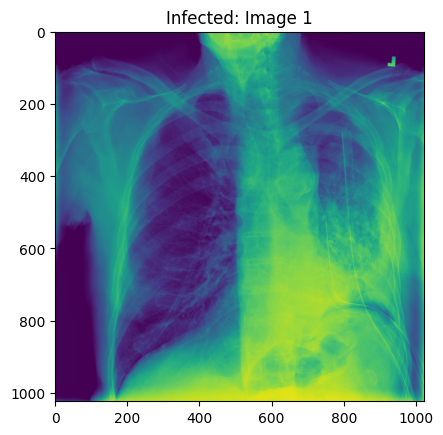

In [2]:
from matplotlib import pyplot
from matplotlib.image import imread

training_infected_image = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset/infected/training_image_1.png"

# load image pixels
image = imread(training_infected_image)

pyplot.title("Infected: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()


## Image Preprocessing

1. Convert each image to an array
2. Map each image labels
3. Augment the each image

### Image Preprocessing: Mapping each image with labels

<center><b>Mapping Each Image With Labels</b><br><img src="https://s3-whjr-curriculum-uploads.whjr.online/1bdade80-2a32-4fc2-8902-f18067803dba.jpeg" width= 1000>

### Image Preprocessing: Data Augmentation

A few Data Augemtation Techniques:

*   Image Rotation
*   Image Height & Width Shift
*   Image Horizontal & Vertical Flipping
*   Image Resizing
*   Image Zooming


<img src="https://s3-whjr-curriculum-uploads.whjr.online/5403e9b1-a339-405d-98b3-36826ec3f04a.gif" width= 400>











### Random Rotations & Width Shift

In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Random Roation & Width Shift using Image Data Generator
training_data_generator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.3,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

# Generate Randomly Rotated Image files
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


## Visualize Preprocessed Images


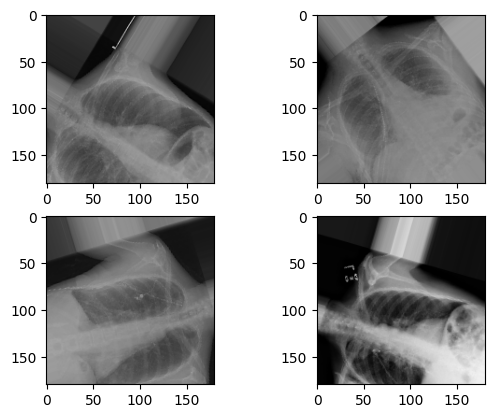

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	# define subplot
	pyplot.subplot(2, 2, i+1)

	# generate batch of images
	batch = training_augmented_images.next()

	# convert to unsigned integers for viewing
	image = batch[0][0].astype('uint8')

	# plot raw pixel data
	pyplot.imshow(image)


pyplot.show()

## Image Preprocessing: Labeling Image


In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

## Additional Activity

#### Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

# Generate Augmented Image files
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.
